In [145]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tkinter as tk
from tkinter import simpledialog
import json
from pandas.io.json import json_normalize
import seaborn as sns
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
from matplotlib.patches import Arc

from functools import reduce

In [146]:
#df = pd.read_excel("Dublin_v_Kerry_cleaned_11mins.xlsx")
#df = pd.read_excel("Dublin_v_Mayo_SF_FullGame.xlsx")
#df = pd.read_excel("Mayo_v_Dublin_SF_FullGame.xlsx")
#df = pd.read_excel("Tyrone_v_Mayo_F_FullGame.xlsx")
#df = pd.read_excel("Mayo_v_Tyrone_F_FullGame.xlsx")
#df = pd.read_excel("Tyrone_v_Kerry_SF_FullGame.xlsx")
#df = pd.read_excel("Kerry_v_Tyrone_SF_FullGame.xlsx")
#df = pd.read_excel("Monaghan_v_Tyrone_UF_FullGame.xlsx")
#df = pd.read_excel("Kildare_v_Kerry_L_Full.xlsx")
df = pd.read_excel("Kerry_v_Galway_F_Full.xlsx")
#df = pd.read_excel("Dublin_v_Meath_LSF_cleaned_FullGame.xlsx")
#df = pd.read_excel("Meath_v_Dublin_LSF_cleaned_FullGame.xlsx")

In [147]:
df.head()

,Unnamed: 0,Event_No,Half,Action,x1,y1,x2,y2,location,pass_end_location,Player,Receiver,Minute,Outcome,Half.1,Quarter
0,0,0,1,turnover,70.287437,44.952788,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN
1,1,1,1,fouled,96.776870,49.933603,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN
2,2,2,1,free wide,96.940385,49.601549,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN
3,3,3,1,successful pass,58.023811,35.323213,59.495446,42.462381,"(58.023811179087886, 35.32321336334121)","(59.49544632925473, 42.4623810138725)",NaN,NaN,1,NaN,1,NaN
4,4,4,1,successful pass,64.564412,45.450870,76.010463,36.983485,"(64.56441184649611, 45.45086979781583)","(76.01046301446053, 36.98348490997639)",NaN,NaN,1,NaN,1,NaN


In [148]:
df = df.drop(df.columns[[0]], axis=1)

In [149]:
df.head()

,Event_No,Half,Action,x1,y1,x2,y2,location,pass_end_location,Player,Receiver,Minute,Outcome,Half.1,Quarter
0,0,1,turnover,70.287437,44.952788,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN
1,1,1,fouled,96.776870,49.933603,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN
2,2,1,free wide,96.940385,49.601549,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN
3,3,1,successful pass,58.023811,35.323213,59.495446,42.462381,"(58.023811179087886, 35.32321336334121)","(59.49544632925473, 42.4623810138725)",NaN,NaN,1,NaN,1,NaN
4,4,1,successful pass,64.564412,45.450870,76.010463,36.983485,"(64.56441184649611, 45.45086979781583)","(76.01046301446053, 36.98348490997639)",NaN,NaN,1,NaN,1,NaN


In [150]:
#team = pd.read_excel("Dublin_team_v_Kerry.xlsx")
#team = pd.read_excel("Meath_team_v_Monaghan_AFL.xlsx")

In [151]:
#player = team
#receiver = team

In [152]:
#player = player.drop(columns=['Receiver', 'Receiver_Name'])
#receiver = receiver.drop(columns=['Player', 'Player_Name'])

In [153]:
#df = pd.merge(df, player, on=['Player'], how='left')

In [154]:
#df = pd.merge(df, receiver, on=['Receiver'], how='left')

In [155]:
#df = df.sort_values(by="Event_No")

In [156]:
df['Player_Name'] = 'NA'
df['Receiver_Name'] = 'NA'

In [157]:
df = df[['Event_No', 'Minute', 'Action', 'x1', 'y1', 'x2', 'y2','location', 'pass_end_location', 'Player', 'Player_Name', 'Receiver', 'Receiver_Name', 'Minute', 'Outcome']]

In [158]:
df.head()

,Event_No,Minute,Action,x1,y1,x2,y2,location,pass_end_location,Player,Player_Name,Receiver,Receiver_Name,Minute,Outcome
0,0,1,turnover,70.287437,44.952788,NaN,NaN,NaN,NaN,NaN,NA,NaN,NA,1,NaN
1,1,1,fouled,96.776870,49.933603,NaN,NaN,NaN,NaN,NaN,NA,NaN,NA,1,NaN
2,2,1,free wide,96.940385,49.601549,NaN,NaN,NaN,NaN,NaN,NA,NaN,NA,1,NaN
3,3,1,successful pass,58.023811,35.323213,59.495446,42.462381,"(58.023811179087886, 35.32321336334121)","(59.49544632925473, 42.4623810138725)",NaN,NA,NaN,NA,1,NaN
4,4,1,successful pass,64.564412,45.450870,76.010463,36.983485,"(64.56441184649611, 45.45086979781583)","(76.01046301446053, 36.98348490997639)",NaN,NA,NaN,NA,1,NaN


# Label Point Function

In [159]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']), size=10, color = "black")

#label_point(df.x, df.y, df.val, ax)

#draw()

# Defensive Actions to Defensive Ratio

In [160]:
kd = df[(df['Action'].str.contains('foul against')) | (df['Action'].str.contains('tackle')) | (df['Action'].str.contains('turnover for'))
 | (df['Action'].str.contains('block'))]

In [161]:
kd

,Event_No,Minute,Action,x1,y1,x2,y2,location,pass_end_location,Player,Player_Name,Receiver,Receiver_Name,Minute,Outcome
8,8,1,tackle,94.814690,9.921059,NaN,NaN,NaN,NaN,NaN,NA,NaN,NA,1,NaN
10,10,1,block,24.339718,55.578526,NaN,NaN,NaN,NaN,NaN,NA,NaN,NA,1,NaN
26,26,1,foul against,56.061631,19.384607,NaN,NaN,NaN,NaN,NaN,NA,NaN,NA,1,NaN
27,27,1,tackle,33.823589,30.674453,NaN,NaN,NaN,NaN,NaN,NA,NaN,NA,1,NaN
28,28,1,block,3.246281,51.427847,NaN,NaN,NaN,NaN,NaN,NA,NaN,NA,1,NaN
38,38,1,tackle,90.726815,9.589004,NaN,NaN,NaN,NaN,NaN,NA,NaN,NA,1,NaN
40,40,1,tackle,53.118361,56.076608,NaN,NaN,NaN,NaN,NaN,NA,NaN,NA,1,NaN
56,56,1,foul against,23.358628,47.775250,NaN,NaN,NaN,NaN,NaN,NA,NaN,NA,1,NaN
96,96,1,tackle,105.443166,60.725368,NaN,NaN,NaN,NaN,NaN,NA,NaN,NA,1,NaN
109,109,1,tackle,29.081653,21.044878,NaN,NaN,NaN,NaN,NaN,NA,NaN,NA,1,NaN


In [162]:
kd = kd[['Action', 'x1']]

In [163]:
kd

,Action,x1
8,tackle,94.814690
10,block,24.339718
26,foul against,56.061631
27,tackle,33.823589
28,block,3.246281
38,tackle,90.726815
40,tackle,53.118361
56,foul against,23.358628
96,tackle,105.443166
109,tackle,29.081653


In [164]:
da1 = len(kd)

In [165]:
cats = ['0-20', '20-40', '40-60', '60-85', '85-105', '105-125', '125-145']
bins = [0, 20, 40, 60, 85, 105, 125, 145]

In [166]:
kd = kd[['Action']].join(pd.get_dummies(pd.cut(kd.x1, bins, labels=cats)))

In [167]:
kd.sum()

Action     tackleblockfoul againsttackleblocktackletackle...
0-20                                                       3
20-40                                                     14
40-60                                                      6
60-85                                                      5
85-105                                                     4
105-125                                                    6
125-145                                                    1
dtype: object

In [168]:
kd = pd.DataFrame(kd.sum()).T

In [169]:
#kd.loc['Total']= kd.sum()
kd['Action'] = 'Defensive'

In [170]:
kd

,Action,0-20,20-40,40-60,60-85,85-105,105-125,125-145
0,Defensive,3,14,6,5,4,6,1


# Opposition Passes

In [171]:
#kf = pd.read_excel("Mayo_v_Dublin_SF_FullGame.xlsx")
#kf = pd.read_excel("Mayo_v_Dublin_SF_FullGame.xlsx")
#kf = pd.read_excel("Tyrone_v_Mayo_F_FullGame.xlsx")
#kf = pd.read_excel("Mayo_v_Tyrone_F_FullGame.xlsx")
#kf = pd.read_excel("Tyrone_v_Kerry_SF_FullGame.xlsx")
#kf = pd.read_excel("Kerry_v_Tyrone_SF_FullGame.xlsx")
kf = pd.read_excel("Galway_v_Kerry_F_Full.xlsx")
#kf = pd.read_excel("Tyrone_v_Monaghan_UF_FullGame.xlsx")
#kf = pd.read_excel("Dublin_v_Meath_LSF_cleaned_FullGame.xlsx")
#kf = pd.read_excel("Meath_v_Dublin_LSF_cleaned_FullGame.xlsx")
#kf1 = pd.read_excel("Dublin_v_Meath_cleaned_2ndHalf.xlsx")

In [172]:
#fra = [kf, kf1]
#kf = pd.concat(fra)

In [173]:
kf.groupby('Action').count()

,Unnamed: 0,Event_No,Half,x1,y1,x2,y2,location,pass_end_location,Player,Receiver,Minute,Outcome,Half.1,Quarter
Action,,,,,,,,,,,,,,,
block,1,1,1,1,1,0,0,0,0,0,0,1,0,1,0
blocked,2,2,2,2,2,0,0,0,0,0,0,2,0,2,0
fortyfive,1,1,1,1,1,0,0,0,0,0,0,1,0,1,0
foul against,11,11,11,11,11,0,0,0,0,0,0,11,0,11,0
fouled,11,11,11,11,11,0,0,0,0,0,0,11,0,11,0
free,4,4,4,4,4,0,0,0,0,0,0,4,0,4,0
free wide,1,1,1,1,1,0,0,0,0,0,0,1,0,1,0
interception,5,5,5,5,5,0,0,0,0,0,0,5,0,5,0
point,11,11,11,11,11,0,0,0,0,0,0,11,0,11,0


In [174]:
#kf.to_excel("tyrone_actions.xlsx")

In [175]:
data = kf

In [176]:
data = data[data['Action'].str.contains('pass')]

#pos = df[(df['Action'].str.contains('foul for')) | (df['Action'].str.contains('point')) | (df['Action'].str.contains('foot pass'))
# | (df['Action'].str.contains('hand pass')) | (df['Action'].str.contains('bad hand pass')) | (df['Action'].str.contains('bad foot pass'))
#  | (df['Action'].str.contains('turnover against')) | (df['Action'].str.contains('block'))]

In [177]:
data.x1 = data.x1.astype(int)
data.x2 = data.x2.astype(int)
data.y1 = data.y1.astype(int)
data.y2 = data.y2.astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [178]:
data.head()

,Unnamed: 0,Event_No,Half,Action,x1,y1,x2,y2,location,pass_end_location,Player,Receiver,Minute,Outcome,Half.1,Quarter
1,1,1,2,successful pass,77,35,111,38,"(77.31858314794216, 35.48924051800473)","(111.49322163515019, 38.809783611275094)",NaN,NaN,1,NaN,2,NaN
2,2,2,2,successful pass,111,38,106,40,"(111.32970661846498, 38.809783611275094)","(106.587771134594, 40.13800084858324)",NaN,NaN,1,NaN,2,NaN
7,7,7,2,successful pass,29,77,24,68,"(29.245168242491662, 77.16205633854783)","(24.01268770856508, 68.6946714507084)",NaN,NaN,1,NaN,2,NaN
8,8,8,2,successful pass,31,45,46,9,"(31.534378476084544, 45.948951261806386)","(46.41424499443828, 9.921058699822906)",NaN,NaN,1,NaN,2,NaN
9,9,9,2,successful pass,77,26,70,35,"(77.48209816462737, 26.02569270218418)","(70.94149749721915, 35.32321336334121)",NaN,NaN,1,NaN,2,NaN


In [179]:
op1 = len(data)

In [180]:
dp = data[['Action']].join(pd.get_dummies(pd.cut(data.x1, bins, labels=cats)))

#kd.sum()

#kd = 
dp = pd.DataFrame(dp.sum()).T

#kd.loc['Total']= kd.sum()
dp['Action'] = 'Passes'

#kd

In [181]:
dp

,Action,0-20,20-40,40-60,60-85,85-105,105-125,125-145
0,Passes,6,25,38,69,71,26,12


In [182]:
dp = dp.rename(columns={"0-20": "125-145", "20-40": "105-125", "40-60": "85-105", "85-105": "40-60", "105-125": "20-40", "125-145": "0-20"})

In [183]:
dp

,Action,125-145,105-125,85-105,60-85,40-60,20-40,0-20
0,Passes,6,25,38,69,71,26,12


In [184]:
div = (dp, kd)
div = pd.concat(div)

In [185]:
div = div.reset_index()

In [186]:
div = div[['0-20', '20-40', '40-60', '60-85', '85-105', '105-125', '125-145']]

In [187]:
div

,0-20,20-40,40-60,60-85,85-105,105-125,125-145
0,12,26,71,69,38,25,6
1,3,14,6,5,4,6,1


In [188]:
half_pitch = div[['0-20', '20-40', '40-60']]

In [189]:
half_pitch['Total'] = half_pitch['0-20'] + half_pitch['20-40'] + half_pitch['40-60']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [190]:
half_pitch

,0-20,20-40,40-60,Total
0,12,26,71,109
1,3,14,6,23


In [191]:
div1 = div

In [192]:
div1.loc['OppPasses'] = div1.loc[0]

In [193]:
div1.loc['DefenseActions'] = div1.loc[1]

In [194]:
div1

,0-20,20-40,40-60,60-85,85-105,105-125,125-145
0,12,26,71,69,38,25,6
1,3,14,6,5,4,6,1
OppPasses,12,26,71,69,38,25,6
DefenseActions,3,14,6,5,4,6,1


In [195]:
#div1.to_excel('mayo_def_tyrone.xlsx')

In [196]:
div.loc['Ratio'] = div.loc[1] / div.loc[0]

In [197]:
div = div.loc['Ratio']

In [198]:
div = div.to_frame()

In [199]:
div = div.T

In [200]:
div

,0-20,20-40,40-60,60-85,85-105,105-125,125-145
Ratio,0.25,0.538462,0.084507,0.0724638,0.105263,0.24,0.166667


In [201]:
div.dtypes

0-20       object
20-40      object
40-60      object
60-85      object
85-105     object
105-125    object
125-145    object
dtype: object

In [202]:
div = div.astype(float)

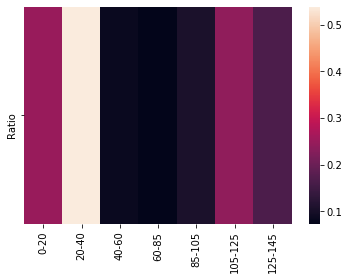

In [203]:
sns.heatmap(div)

In [204]:
div['0-20'] = 0.0
div['125-145'] = 0.0

In [205]:
div

,0-20,20-40,40-60,60-85,85-105,105-125,125-145
Ratio,0.0,0.538462,0.084507,0.072464,0.105263,0.24,0.0


In [206]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [207]:
def draw_map():
  #  data = data[(data['Action'] == "point") | (data['Action'] == "short") & (data['Player_Name'] == player_name)]
    #data = data[(data['Player_Name'] == player_name)]
 #   good_pass = data[(data['Action'].str.contains("good")) & (data['Player_Name'] == player_name)]
  #  bad_pass = data[(data['Action'].str.contains("bad")) & (data['Player_Name'] == player_name)]
    #action_data = data[(data['Player_Name']==player_name)]
   # fig, ax = plt.subplots()
    fig=plt.figure()
    fig.set_size_inches(17, 10)
    ax=fig.add_subplot(1,1,1)
    
    

#Pitch Outline & Centre Line
    plt.plot([0,0],[0,88], color="black")
    plt.plot([0,145],[88,88], color="black")
    plt.plot([145,145],[88,0], color="black")
    plt.plot([145,0],[0,0], color="black")

    ly97 = [39,49] 
    lx97 = [72.5,72.5]
    plt.plot(lx97,ly97,color="black")

            #goals#
    ly4 = [40.75,40.75,47.25,47.25]
    lx4 = [145,145.2,145.2,145]
    plt.plot(lx4,ly4,color="black")

    ly5 = [40.75,40.75,47.25,47.25]
    lx5 = [0,-0.2,-0.2,0]
    plt.plot(lx5,ly5,color="black")

           #6 yard boxes#
    ly6 = [37,37,51,51]
    lx6 = [145,140.5,140.5,145]
    plt.plot(lx6,ly6,color="black")

    ly7 = [37,37,51,51]
    lx7 = [0,4.5,4.5,0]
    plt.plot(lx7,ly7,color="black")
    
            #large rectangle
    ly88 = [34.5,34.5,53.5,53.5]
    lx88 = [145,131,131,145]
    plt.plot(lx88,ly88,color="black",zorder=5)

    ly87 = [34.5,34.5,53.5,53.5]
    lx87 = [0,14,14,0]
    plt.plot(lx87,ly87,color="black",zorder=5)
        
        #halfway small line
    ly97 = [39,49] 
    lx97 = [72.5,72.5]
    plt.plot(lx97,ly97,color="black")
        
        #peno lines
    ly90 = [43.5,44.5] 
    lx90 = [11,11]
    plt.plot(lx90,ly90,color="black")
        
    ly89 = [43.5,44.5] 
    lx89 = [136,136]
    plt.plot(lx89,ly89,color="black")
        
        #14 yard line across the pitch
    ly94 = [0,88] 
    lx94 = [14,14]
    plt.plot(lx94,ly94,color="black")
        
    ly99 = [0,88] 
    lx99 = [131,131]
    plt.plot(lx99,ly99,color="black")
       
    #21 yard line
    ly98 = [0,88] 
    lx98 = [124,124]
    plt.plot(lx98,ly98,color="black")
        
    ly93 = [0,88] 
    lx93 = [21,21]
    plt.plot(lx93,ly93,color="black")
     
    #45 metre line
    ly96 = [0,88] 
    lx96 = [100,100]
    plt.plot(lx96,ly96,color="black")
        
    ly91 = [0,88] 
    lx91 = [45,45]
    plt.plot(lx91,ly91,color="black")
        
     #65 yard line
    ly95 = [0,88] 
    lx95 = [80,80]
    plt.plot(lx95,ly95,color="black")
        
    ly92 = [0,88] 
    lx92 = [65,65]
    plt.plot(lx92,ly92,color="black")
    
   # ly921 = [124,30] 
 #   lx921 = [0,30]
  #  plt.plot(lx921,color="black")
    

#Prepare Arcs
    leftArc = Arc((21,44.5),height=26,width=26,angle=0,theta1=270,theta2=90,color="black")
    rightArc = Arc((124,44.5),height=26,width=26,angle=0,theta1=90,theta2=270,color="black")

#Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)

#Tidy Axes
    plt.axis('off')
    
    #fig, ax = plt.subplots()
# the size of A4 paper
    
    M = 1
    N = 7
    data = div
# sns.heatmap(data)
    c = ax.pcolormesh(np.linspace(0, 145, N+1), np.linspace(0, 88, M+1), data, alpha=0.4, cmap=plt.cm.get_cmap('Reds'))
             # cmap=sns.color_palette("rocket", as_cmap=True))
    fig.colorbar(c, ax=ax)
  #  sns.heatmap(div)
    #fig.set_size_inches(11.7, 8.27)
    #sns.kdeplot(data["x1"],data["y1"], shade=True, n_levels=50)
    #sns.set(rc={'figure.figsize':(11.7,8.27)})
   # plt.ylim(0, 88)
    #plt.xlim(0, 145)

   # for i in range(len(data)):
        #color="red" if "short" in data.iloc[i].Action else "blue"
       # if "pass" in pass_data.iloc[i].Action
        #plt.plot([int(data["x1"].iloc[i])],
         #        [int(data["y1"].iloc[i])], 
          #       color = color,
           #      )
    
        #plt.plot(int(data["x1"].iloc[i]), int(data["y1"].iloc[i]),"o", color = "yellow", markersize=15)
        
       # label_point(data.x1, data.y1, data.Player_Name, ax)
    #plt.plot(int(data["Xstart"][i]),int(data["Ystart"][i]),"o", color="green")
    
    ax.set_title('Attacking >>>>>>>')

    #Display Pitch
    plt.show()
    
    fig.savefig('kerry_PPDA_V_galway.pdf')


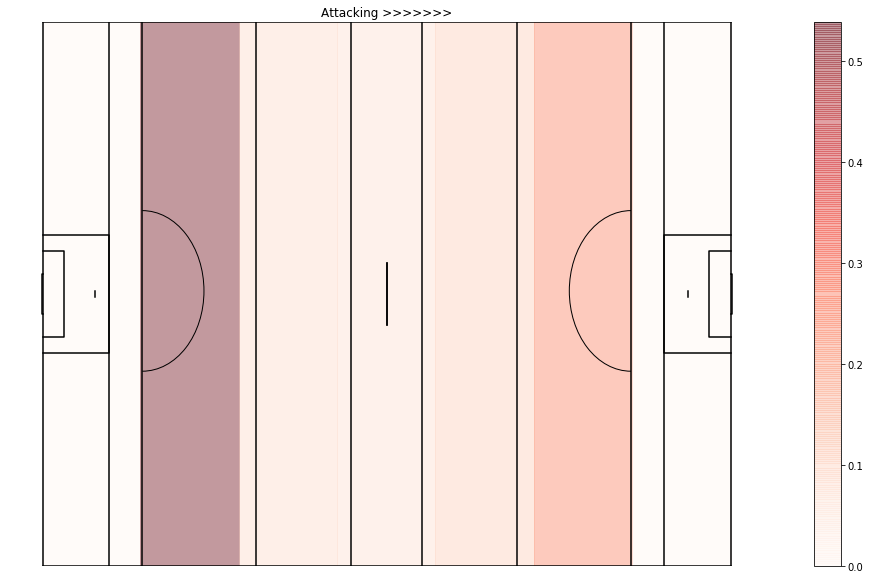

In [208]:
draw_map()

In [209]:
def defending_map(data, player_name):
  #  shot_data = data[(data['Action'] == "point") | (data['Action'] == "short") & (data['Player_Name'] == player_name)]
    shot_data = data[(data['Player_Name'] == player_name) & ((data['Action'] == "tackle") | (data['Action'] == "turnover") | (data['Action'] == "block") 
                                                             | (data['Action'] == "foul against"))]
 #   good_pass = data[(data['Action'].str.contains("good")) & (data['Player_Name'] == player_name)]
  #  bad_pass = data[(data['Action'].str.contains("bad")) & (data['Player_Name'] == player_name)]
    #action_data = data[(data['Player_Name']==player_name)]
    
    fig=plt.figure()
    fig.set_size_inches(14.5, 8.8)
    ax=fig.add_subplot(1,1,1)

#Pitch Outline & Centre Line
    plt.plot([0,0],[0,88], color="black")
    plt.plot([0,145],[88,88], color="black")
    plt.plot([145,145],[88,0], color="black")
    plt.plot([145,0],[0,0], color="black")

    ly97 = [39,49] 
    lx97 = [72.5,72.5]
    plt.plot(lx97,ly97,color="black")
    
    ly88 = [34.5,34.5,53.5,53.5]
    lx88 = [145,131,131,145]
    plt.plot(lx88,ly88,color="black",zorder=5)

    ly87 = [34.5,34.5,53.5,53.5]
    lx87 = [0,14,14,0]
    plt.plot(lx87,ly87,color="black",zorder=5)

            #goals#
    ly4 = [40.75,40.75,47.25,47.25]
    lx4 = [145,145.2,145.2,145]
    plt.plot(lx4,ly4,color="black")

    ly5 = [40.75,40.75,47.25,47.25]
    lx5 = [0,-0.2,-0.2,0]
    plt.plot(lx5,ly5,color="black")

           #6 yard boxes#
    ly6 = [37,37,51,51]
    lx6 = [145,140.5,140.5,145]
    plt.plot(lx6,ly6,color="black")

    ly7 = [37,37,51,51]
    lx7 = [0,4.5,4.5,0]
    plt.plot(lx7,ly7,color="black")
        
        #halfway small line
    ly97 = [39,49] 
    lx97 = [72.5,72.5]
    plt.plot(lx97,ly97,color="black")
        
        #peno lines
    ly90 = [43.5,44.5] 
    lx90 = [11,11]
    plt.plot(lx90,ly90,color="black")
        
    ly89 = [43.5,44.5] 
    lx89 = [136,136]
    plt.plot(lx89,ly89,color="black")
        
        #14 yard line across the pitch
    ly94 = [0,88] 
    lx94 = [14,14]
    plt.plot(lx94,ly94,color="black")
        
    ly99 = [0,88] 
    lx99 = [131,131]
    plt.plot(lx99,ly99,color="black")
       
    #21 yard line
    ly98 = [0,88] 
    lx98 = [124,124]
    plt.plot(lx98,ly98,color="black")
        
    ly93 = [0,88] 
    lx93 = [21,21]
    plt.plot(lx93,ly93,color="black")
     
    #45 metre line
    ly96 = [0,88] 
    lx96 = [100,100]
    plt.plot(lx96,ly96,color="black")
        
    ly91 = [0,88] 
    lx91 = [45,45]
    plt.plot(lx91,ly91,color="black")
        
     #65 yard line
    ly95 = [0,88] 
    lx95 = [80,80]
    plt.plot(lx95,ly95,color="black")
        
    ly92 = [0,88] 
    lx92 = [65,65]
    plt.plot(lx92,ly92,color="black")

#Prepare Arcs
    leftArc = Arc((21,44.5),height=26,width=26,angle=0,theta1=270,theta2=90,color="black")
    rightArc = Arc((124,44.5),height=26,width=26,angle=0,theta1=90,theta2=270,color="black")

#Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)

#Tidy Axes
    plt.axis('off')

    sns.kdeplot(shot_data["x1"],shot_data["y1"], shade=True, n_levels=50, color="green")
    plt.ylim(0, 88)
    plt.xlim(0, 145)

    for i in range(len(shot_data)):
        #color="red" if "wide" in shot_data.iloc[i].Action else "blue" if "point" in shot_data.iloc[i].Action else "red" if "goal miss" in shot_data.iloc[i].Action else "yellow" if "free" in shot_data.iloc[i].Action else "black" 
        color="red" if "foul" in shot_data.iloc[i].Action else "yellow" if "turnover" in shot_data.iloc[i].Action else "blue"
        #if "point" in shot_data.iloc[i].Action else "red" if "goal miss" in shot_data.iloc[i].Action else "red" if "short" in shot_data.iloc[i].Action else "yellow" if "free" in shot_data.iloc[i].Action else "black" 
    # if "pass" in pass_data.iloc[i].Action
        #plt.plot([int(shot_data["x1"].iloc[i])],
         #        [int(shot_data["y1"].iloc[i])], 
          #       color = color,
           #      )
    
        plt.plot(int(shot_data["x1"].iloc[i]), int(shot_data["y1"].iloc[i]),"o", color = color, markersize=15)
        #label_point(data.x1, data.y1, data.Player_Name, ax)
    #plt.plot(int(data["Xstart"][i]),int(data["Ystart"][i]),"o", color="green")
    
    #plt.legend()

    #Display Pitch
    plt.show()
    
    fig.savefig('ker_def_v_gal.pdf')


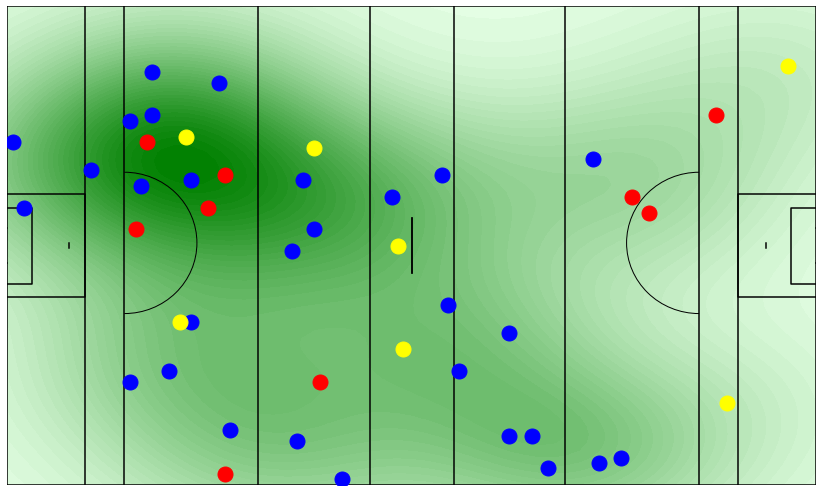

In [210]:
defending_map(df, df['Player_Name'])

# PPDA Overall

In [211]:
da1

39

In [212]:
op1

247

In [213]:
ppda = op1 / da1

In [214]:
sq = [['Kerry', ppda]]
 
# Create the pandas DataFrame
sq1 = pd.DataFrame(sq, columns = ['Team', 'PPDA'])
 


In [215]:
sq1.to_excel('kerry_PPDA_vsgalway.xlsx')

In [216]:
sq1

,Team,PPDA
0,Kerry,6.333333
